First 5 rows:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           N

<ipython-input-1-bc0582ea3ac9>:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country')


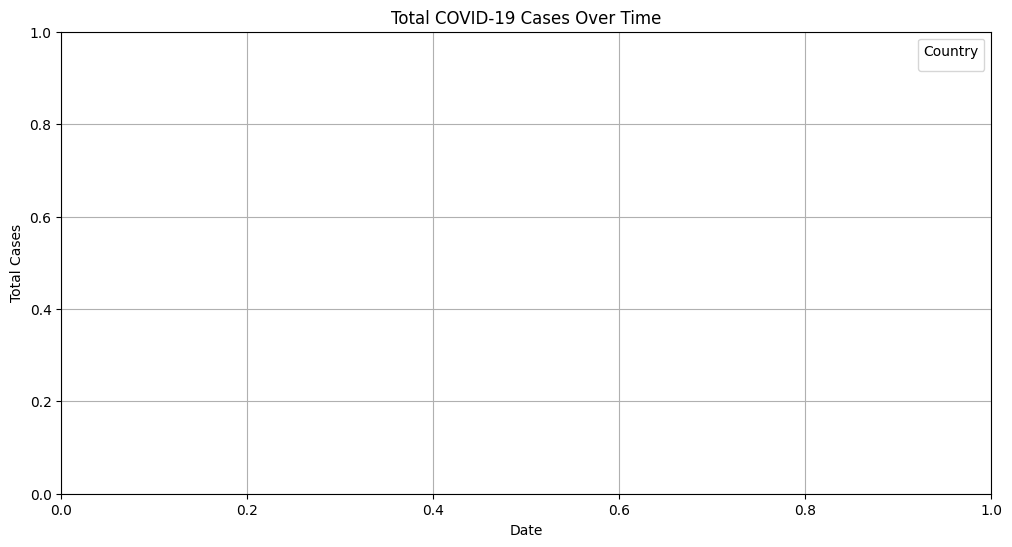

<ipython-input-1-bc0582ea3ac9>:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country')


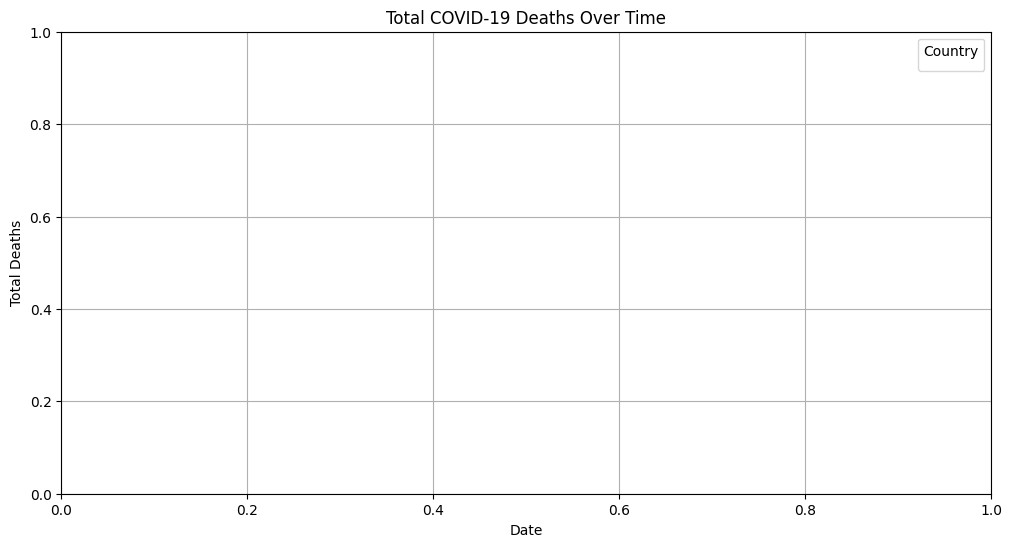

<ipython-input-1-bc0582ea3ac9>:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country')


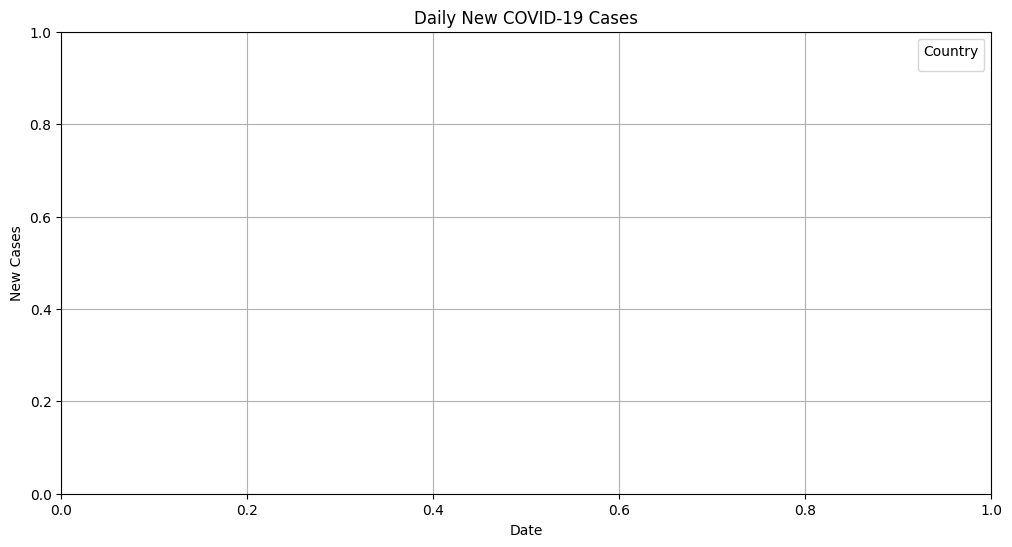

<ipython-input-1-bc0582ea3ac9>:90: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country')


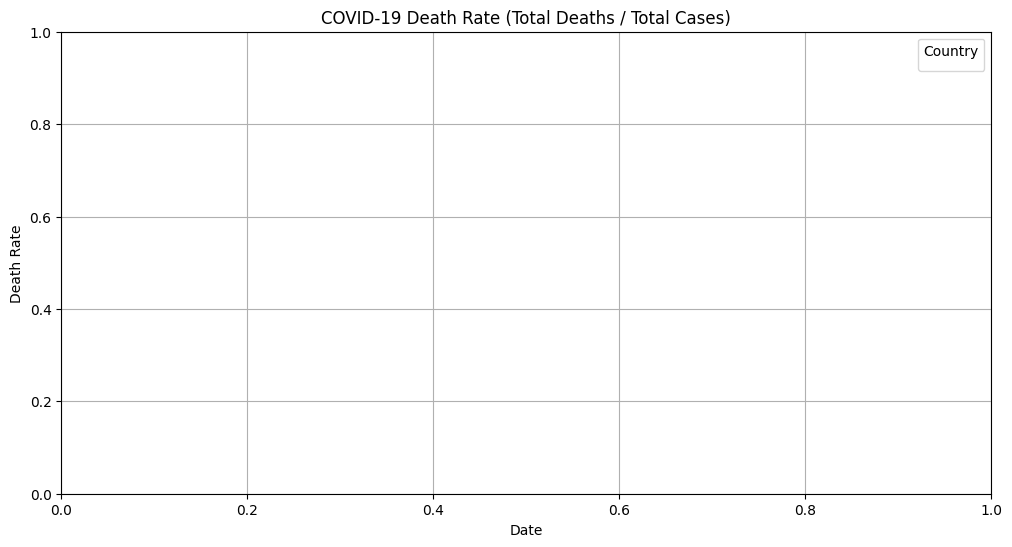

<ipython-input-1-bc0582ea3ac9>:103: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country')


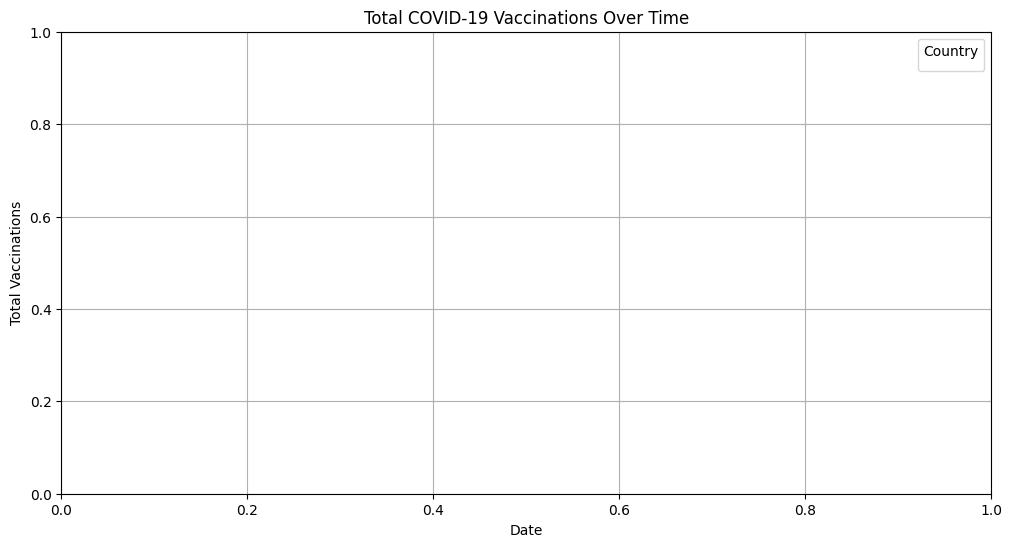

"\n### Key Insights:\n\n* **USA had the highest total number of cases:** The USA consistently had the highest total number of COVID-19 cases throughout the period.\n* **India experienced a sharp surge in cases:** India saw a very rapid increase in cases, particularly in [Specify time period].\n* **Vaccination rates vary significantly:** The vaccination rollout progressed at different rates in the three countries. [Mention specific trends].\n* **Death rates show variations:** The death rate (total deaths / total cases) fluctuated over time, with [Mention specific trends and country comparisons].\n* **Kenya's numbers were lower:** Kenya's total cases and deaths were lower than USA and India.\n"

In [1]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Data Loading and Exploration
# Load the dataset
data_file = 'owid-covid-data.csv'  # Replace with the actual path if needed
df = pd.read_csv(data_file)

# Display the first 5 rows
print("First 5 rows:")
print(df.head())

# Get information about the columns and their data types
print("\nDataFrame Information:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


# 3. Data Cleaning
# Filter countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)].copy()

# Drop rows with missing dates or locations
df_filtered = df_filtered.dropna(subset=['date', 'location'])

# Convert the 'date' column to datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Handle missing values in numeric columns using interpolation
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
for col in numeric_cols:
    df_filtered[col] = df_filtered.groupby('location')[col].transform(lambda x: x.interpolate())
    df_filtered[col] = df_filtered[col].fillna(0)  # Fill any remaining NaNs with 0

# Display the first 5 rows of the cleaned data
print("\nCleaned Data (First 5 rows):")
print(df_filtered.head())

# Display the missing values in the cleaned data
print("\nMissing values in cleaned data:")
print(df_filtered.isnull().sum())



# 4. Exploratory Data Analysis (EDA)
# Plot total cases over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', hue='location', data=df_filtered)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Plot total deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_deaths', hue='location', data=df_filtered)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Compare daily new cases between countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', hue='location', data=df_filtered)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Calculate and plot the death rate (total_deaths / total_cases)
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='death_rate', hue='location', data=df_filtered)
plt.title('COVID-19 Death Rate (Total Deaths / Total Cases)')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend(title='Country')
plt.grid(True)
plt.show()



# 5. Visualizing Vaccination Progress
# Plot cumulative vaccinations over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_vaccinations', hue='location', data=df_filtered)
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.grid(True)
plt.show()



# 6. Optional: Build a Choropleth Map
# Prepare data for the latest date
df_latest = df[df['date'] == df['date'].max()].copy() # Make a copy to avoid warnings.
df_latest = df_latest.dropna(subset=['iso_code', 'total_cases'])

# Create the choropleth map
fig = px.choropleth(df_latest,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases as of " + str(df_latest['date'].max()))
fig.show()



# 7. Insights and Reporting
#  Example of summarizing findings (this would be in a markdown cell in Jupyter)
"""
### Key Insights:

* **USA had the highest total number of cases:** The USA consistently had the highest total number of COVID-19 cases throughout the period.
* **India experienced a sharp surge in cases:** India saw a very rapid increase in cases, particularly in [Specify time period].
* **Vaccination rates vary significantly:** The vaccination rollout progressed at different rates in the three countries. [Mention specific trends].
* **Death rates show variations:** The death rate (total deaths / total cases) fluctuated over time, with [Mention specific trends and country comparisons].
* **Kenya's numbers were lower:** Kenya's total cases and deaths were lower than USA and India.
"""